In [2]:
!pip install numpy
!pip install pandas

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('TESTDATASET.csv', encoding='latin-1')

In [5]:
data.head()

,NO,SUPPLIER,DATE,WEHICAL,WEIGHT,AMOUNT,RATE,MONTH,FIREWOOD TYPE,RAINY SEASON
0,1,DHARMAWARDHANA,5/10/2020,AB-3808,2210,8840,4.0,May,Jackfruit,1
1,2,DHARMAWARDHANA,5/11/2020,LD-9656,2100,8400,4.0,May,Mahogany,1
2,3,DHARMAWARDHANA,5/11/2020,49-5794,2970,11880,4.0,May,Teak,1
3,4,DHARMAWARDHANA,5/11/2020,PU-9815,2280,9120,4.0,May,Cashew,1
4,5,DHARMAWARDHANA,5/12/2020,GF-8446,2390,9560,4.0,May,Mango,1


In [6]:
def analzeData(data):
    print (data.shape)
    print (data.info)
    print (data.head())
    print(data.describe().transpose())
    
analzeData(data)

(2290, 10)
<bound method DataFrame.info of         NO        SUPPLIER       DATE   WEHICAL  WEIGHT  AMOUNT  RATE  \
0        1  DHARMAWARDHANA  5/10/2020   AB-3808    2210    8840   4.0   
1        2  DHARMAWARDHANA  5/11/2020   LD-9656    2100    8400   4.0   
2        3  DHARMAWARDHANA  5/11/2020   49-5794    2970   11880   4.0   
3        4  DHARMAWARDHANA  5/11/2020   PU-9815    2280    9120   4.0   
4        5  DHARMAWARDHANA  5/12/2020   GF-8446    2390    9560   4.0   
...    ...             ...        ...       ...     ...     ...   ...   
2285  2286  DHARMAWARDHANA   9/5/2022   68-1405    2660   31920  12.0   
2286  2287  DHARMAWARDHANA   9/5/2022   41-6026    2170   26040  12.0   
2287  2288  DHARMAWARDHANA   9/5/2022  226-9101    2510   30120  12.0   
2288  2289  DHARMAWARDHANA   9/5/2022   LB-3070    1760   21120  12.0   
2289  2290  DHARMAWARDHANA   9/5/2022   PT-7212    4940   59280  12.0   

          MONTH FIREWOOD TYPE  RAINY SEASON  
0           May     Jackfruit     

In [7]:
data.shape

(2290, 10)

In [8]:
data.corr()['AMOUNT']

NO              0.139410
WEIGHT          0.937491
AMOUNT          1.000000
RATE            0.292463
RAINY SEASON    0.058449
Name: AMOUNT, dtype: float64

In [9]:
data['FIREWOOD TYPE'].value_counts()

Mango        432
Teak         378
Cashew       315
Halmilla     290
Mahogany     194
Mara         192
Palu         130
Nedun        125
Kohomba      118
Jackfruit    116
Name: FIREWOOD TYPE, dtype: int64

In [10]:
def add_WOOD(inpt):
    if inpt == 'Palu' or inpt == 'Nedun' or inpt == 'Kohomba' or inpt == 'Jackfruit':
        return 'Other'
    else:
        return inpt

In [11]:
data['FIREWOOD TYPE'] = data['FIREWOOD TYPE'].apply(add_WOOD)

In [12]:
data['FIREWOOD TYPE'].value_counts()

Other       489
Mango       432
Teak        378
Cashew      315
Halmilla    290
Mahogany    194
Mara        192
Name: FIREWOOD TYPE, dtype: int64

# Data cleaning

In [13]:
#delete duplicate value
def duplicateValue (data):
    data.drop_duplicates(inplace=True)
    return data
data = duplicateValue(data)

In [14]:
#remove null value
data.isnull().sum()

NO               0
SUPPLIER         0
DATE             0
WEHICAL          1
WEIGHT           0
AMOUNT           0
RATE             0
MONTH            0
FIREWOOD TYPE    0
RAINY SEASON     0
dtype: int64

In [15]:
data = data.dropna()

In [16]:
#remove null value
data.isnull().sum()

NO               0
SUPPLIER         0
DATE             0
WEHICAL          0
WEIGHT           0
AMOUNT           0
RATE             0
MONTH            0
FIREWOOD TYPE    0
RAINY SEASON     0
dtype: int64

In [17]:
import pandas as pd
import numpy as np

def remove_outliers(data, column_name, threshold):
   
    # Calculate the column's mean and standard deviation
    mean = data[column_name].mean()
    std = data[column_name].std()
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    
    # Remove rows where the column value is outside the bounds
    data = data[(data[column_name] > lower_bound) & (data[column_name] < upper_bound)]
    
    return data


# Remove outliers from the 'AMOUNT " column a threshold of 1.5
data= remove_outliers(data, 'AMOUNT',1.5)

# Check the resulting dataframe
data.shape

(2257, 10)

In [17]:
# Remove outliers from the 'RATE' column with a threshold of 1.5
data= remove_outliers(data, 'RATE',1.5)

# Remove outliers from the 'RAINY SEASON' column with a threshold of 1.5
data= remove_outliers(data, 'RAINY SEASON',1.5)

# Remove outliers from the 'WEIGHT' column with a threshold of 1.5
data= remove_outliers(data, 'WEIGHT',1.5)


# Check the resulting dataframe
data.shape

(1777, 10)

# Visulization Data

In [18]:
import matplotlib.pyplot as plt

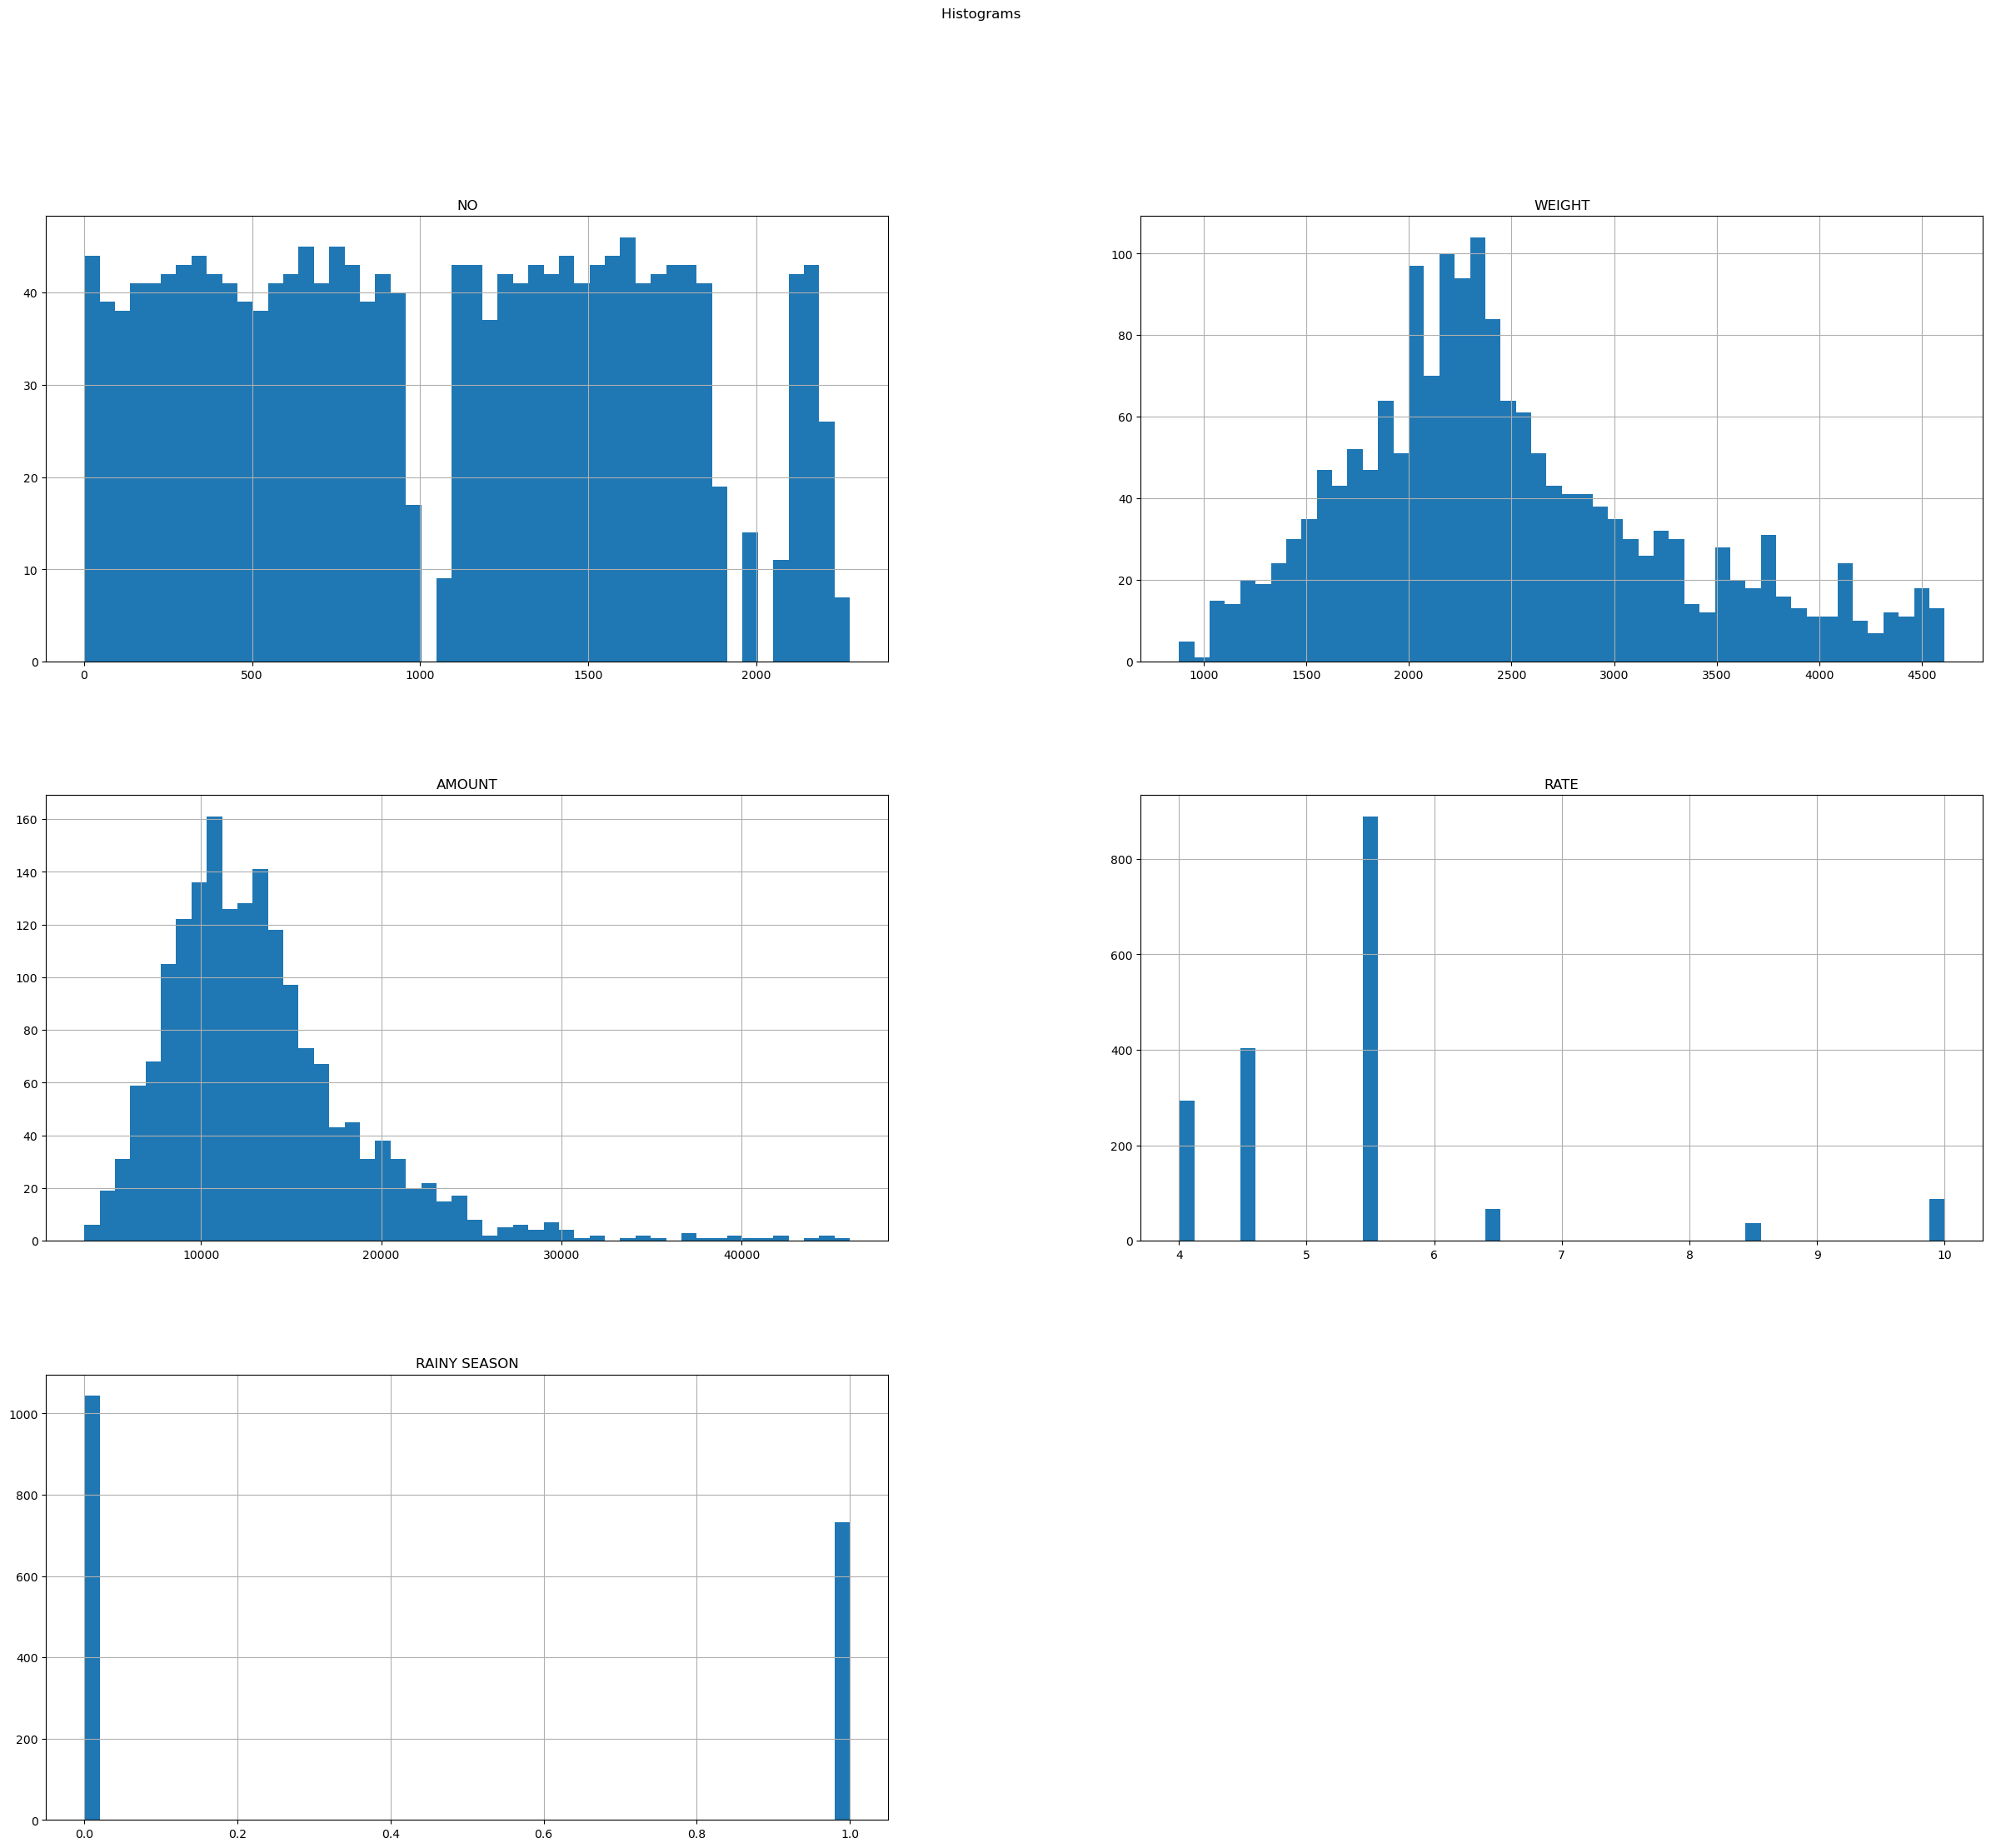

In [19]:
def visualize_data(data):
    
    # Histograms
    data.hist(bins=50, figsize=(30, 25))
    plt.suptitle("Histograms ")
    plt.show()
    
visualize_data(data)

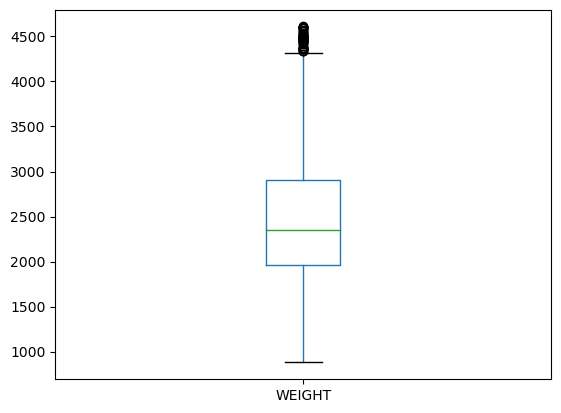

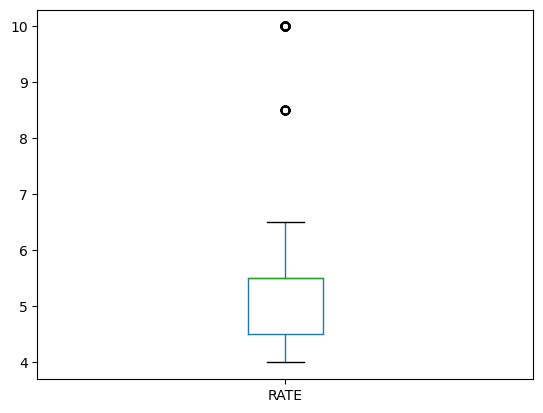

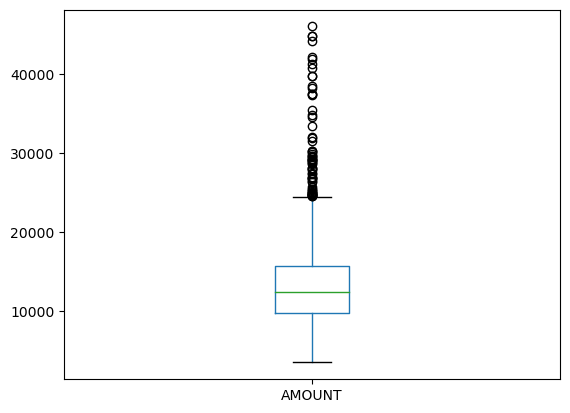

In [20]:
#Boxplot
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
    
plot_boxplot(data, "WEIGHT" )
plot_boxplot(data, "RATE" )
plot_boxplot(data, "AMOUNT" )

# Delete unnecessary columns

In [21]:
data = data.drop(columns=['NO', 'SUPPLIER', 'DATE', 'WEHICAL'])

In [22]:
data.head()

,WEIGHT,AMOUNT,RATE,MONTH,FIREWOOD TYPE,RAINY SEASON
0,2210,8840,4.0,May,Other,1
1,2100,8400,4.0,May,Mahogany,1
2,2970,11880,4.0,May,Teak,1
3,2280,9120,4.0,May,Cashew,1
4,2390,9560,4.0,May,Mango,1


# One-Hot Encoding

In [23]:
data = pd.get_dummies(data)

In [24]:
data.head()

,WEIGHT,AMOUNT,RATE,RAINY SEASON,MONTH_April,MONTH_August,MONTH_December,MONTH_February,MONTH_January,MONTH_July,...,MONTH_November,MONTH_October,MONTH_September,FIREWOOD TYPE_Cashew,FIREWOOD TYPE_Halmilla,FIREWOOD TYPE_Mahogany,FIREWOOD TYPE_Mango,FIREWOOD TYPE_Mara,FIREWOOD TYPE_Other,FIREWOOD TYPE_Teak
0,2210,8840,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2100,8400,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2970,11880,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2280,9120,4.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2390,9560,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
data.shape

(1777, 23)

In [26]:
data.corr()['AMOUNT']

WEIGHT                    0.763687
AMOUNT                    1.000000
RATE                      0.615767
RAINY SEASON             -0.006349
MONTH_April               0.110442
MONTH_August             -0.077753
MONTH_December            0.263667
MONTH_February            0.018690
MONTH_January             0.019642
MONTH_July               -0.126573
MONTH_June               -0.043918
MONTH_March               0.012192
MONTH_May                 0.041226
MONTH_November           -0.042543
MONTH_October            -0.128595
MONTH_September           0.002466
FIREWOOD TYPE_Cashew     -0.028832
FIREWOOD TYPE_Halmilla    0.044062
FIREWOOD TYPE_Mahogany    0.004400
FIREWOOD TYPE_Mango       0.029854
FIREWOOD TYPE_Mara       -0.000624
FIREWOOD TYPE_Other      -0.037732
FIREWOOD TYPE_Teak       -0.005117
Name: AMOUNT, dtype: float64

# Model Building and Selection

In [27]:
X = data.drop('AMOUNT', axis=1)
y = data['AMOUNT']

In [28]:
pip install scikit-learn==1.3.1

     ---------------------------------------- 9.3/9.3 MB 3.5 MB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


# Divide dataset into training and testing set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [30]:
X_train.shape, X_test.shape

((1421, 22), (356, 22))

# model training

In [31]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

from sklearn.linear_model import Lasso
lasso = Lasso()
model_acc(lasso)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

LinearRegression() --> 0.9588132939553085
Lasso() --> 0.9590076667576686
DecisionTreeRegressor() --> 0.9938107626266813
RandomForestRegressor() --> 0.9958324254333802


# Hyperparameter tuning

In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 50, 100],
              'criterion':['squared_error','absolute_error','poisson']}

grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)

grid_fit = grid_obj.fit(X_train, y_train)

best_model = grid_fit.best_estimator_

best_model.score(X_test, y_test)

0.9958367782930255

In [34]:
import pickle
with open('PREDICTION_FIREWOOD_NEW_UPDATE.pickle', 'wb') as file:
    pickle.dump(best_model, file)

In [35]:
X_test.columns

Index(['WEIGHT', 'RATE', 'RAINY SEASON', 'MONTH_April', 'MONTH_August',
       'MONTH_December', 'MONTH_February', 'MONTH_January', 'MONTH_July',
       'MONTH_June', 'MONTH_March', 'MONTH_May', 'MONTH_November',
       'MONTH_October', 'MONTH_September', 'FIREWOOD TYPE_Cashew',
       'FIREWOOD TYPE_Halmilla', 'FIREWOOD TYPE_Mahogany',
       'FIREWOOD TYPE_Mango', 'FIREWOOD TYPE_Mara', 'FIREWOOD TYPE_Other',
       'FIREWOOD TYPE_Teak'],
      dtype='object')

In [39]:
best_model.predict([[125,10, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,]])

C:\Users\ravin\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10777.])